PILLOW TOOL

In [45]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Load and convert image using Pillow
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_8bb1d9de.jpg"  # Replace with your image path
image_pillow = Image.open(image_path).convert("L")  # Convert to grayscale


In [46]:

# 1. Image Enhancement (Equalize)
enhanced_image_pillow = ImageOps.equalize(image_pillow)

# 2. Noise Removal (Gaussian and Median Filter)
gaussian_filtered_image_pillow = enhanced_image_pillow.filter(ImageFilter.GaussianBlur(radius=2))
median_filtered_image_pillow = enhanced_image_pillow.filter(ImageFilter.MedianFilter(size=3))

# 3. Image Operations (Edge detection)
edges_pillow = median_filtered_image_pillow.filter(ImageFilter.FIND_EDGES)

# 4. Thresholding to create a binary image
threshold_value = 128
binary_image = edges_pillow.point(lambda p: p > threshold_value and 255)


Text(0.5, 1.0, 'Enhanced Image')

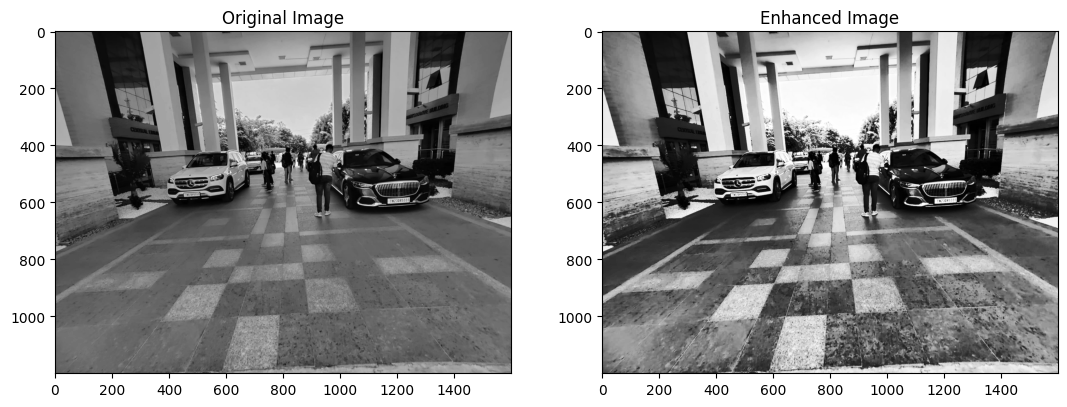

In [47]:

# 5. Convert to NumPy array for labeling
binary_array = np.array(binary_image)

# 6. Label connected components
labeled_array, num_objects = label(binary_array > 0)

# Display images using Matplotlib
plt.figure(figsize=(20, 16))

plt.subplot(3, 3, 1)
plt.imshow(image_pillow, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(enhanced_image_pillow, cmap='gray')
plt.title('Enhanced Image')


Text(0.5, 1.0, 'Median Filtered')

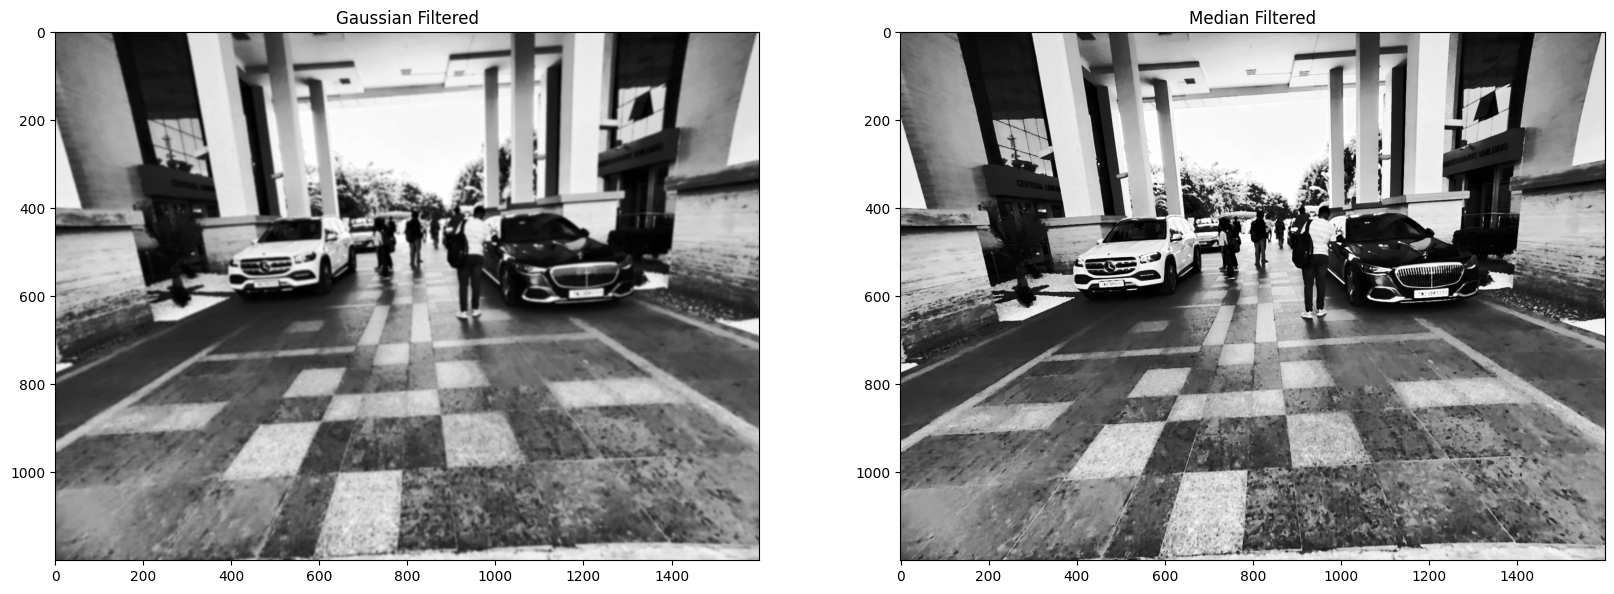

In [48]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.imshow(gaussian_filtered_image_pillow, cmap='gray')
plt.title('Gaussian Filtered')

plt.subplot(2, 2, 2)
plt.imshow(median_filtered_image_pillow, cmap='gray')
plt.title('Median Filtered')


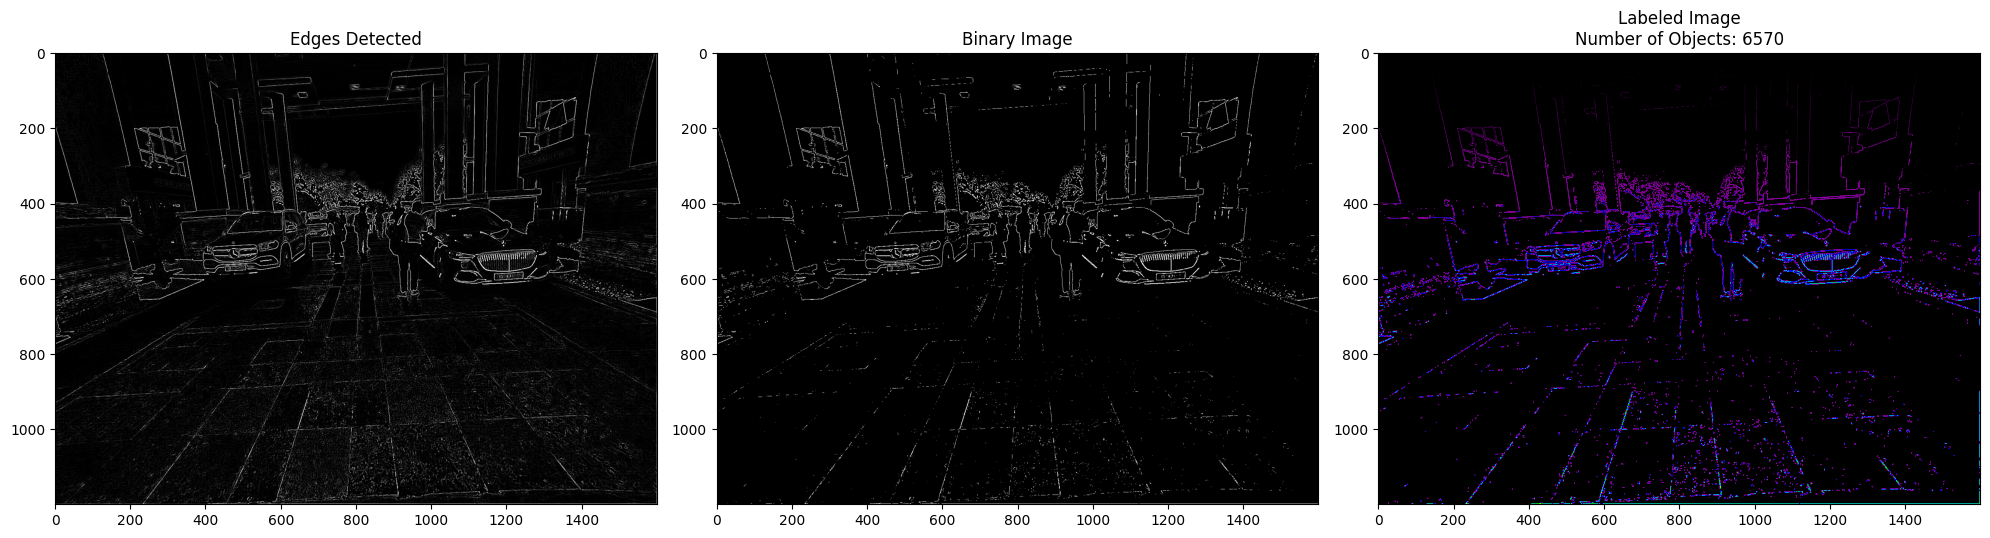

In [49]:
plt.figure(figsize=(20, 16))

plt.subplot(3, 3, 1)
plt.imshow(edges_pillow, cmap='gray')
plt.title('Edges Detected')

plt.subplot(3, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')

plt.subplot(3, 3, 3)
plt.imshow(labeled_array, cmap='nipy_spectral')
plt.title(f'Labeled Image\nNumber of Objects: {num_objects}')

plt.tight_layout()
plt.show()
